## 1 - Packages



In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Lambda, Flatten, Dense
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K
K.set_image_data_format('channels_last')
import os
import numpy as np
from numpy import genfromtxt
import pandas as pd
import tensorflow as tf
import PIL

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

## 2 - Encoding Face Images into a 128-Dimensional Vector

### 2.1 - Using a ConvNet to Compute Encodings

In [6]:
from tensorflow.keras.models import model_from_json

json_file = open('/content/drive/MyDrive/Face_Recognition/home/jovyan/work/W4A1/keras-facenet-h5/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights('/content/drive/MyDrive/Face_Recognition/home/jovyan/work/W4A1/keras-facenet-h5/model.h5')

In [7]:
print(model.inputs)
print(model.outputs)

[<KerasTensor: shape=(None, 160, 160, 3) dtype=float32 (created by layer 'input_1')>]
[<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'Bottleneck_BatchNorm')>]


In [8]:
FRmodel = model

## 3 - Applying the Model

### 3.1 - Face Verification





In [9]:
def img_to_encoding(image_path, model):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(160, 160))
    img = np.around(np.array(img) / 255.0, decimals=12)
    x_train = np.expand_dims(img, axis=0)
    embedding = model.predict_on_batch(x_train)
    return embedding / np.linalg.norm(embedding, ord=2)

In [10]:
database = {}
database["Cristiano Ronaldo"] = img_to_encoding("/content/drive/MyDrive/croppedMostTrue/Cristiano Ronaldo/Cristiano Ronaldo1.png", FRmodel)
database["Lionel Messi"] = img_to_encoding("/content/drive/MyDrive/croppedMostTrue/Lionel Messi/Lionel Messi1.png", FRmodel)
database["Didier Drogba"] = img_to_encoding("/content/drive/MyDrive/croppedMostTrue/Didier Drogba/Didier Drogba11.png", FRmodel)
database["Andress Iniesta"] = img_to_encoding("/content/drive/MyDrive/croppedMostTrue/Andreas Iniesta/Andreas Iniesta10.png", FRmodel)
database["Mohammed Salah"] = img_to_encoding("/content/drive/MyDrive/croppedMostTrue/Mohamed Salah/Mohamed Salah1.png", FRmodel)
database["Pavel Nedved"] = img_to_encoding("/content/drive/MyDrive/croppedMostTrue/Pavel Nedved/Pavel Nedved1.png", FRmodel)
database["Pele"] = img_to_encoding("/content/drive/MyDrive/croppedMostTrue/Pele/Edson Arantes do Nascimento301.png", FRmodel)
database["Ronaldinho"] = img_to_encoding("/content/drive/MyDrive/croppedMostTrue/Ronaldinho/Ronaldinho1.png", FRmodel)
database["Roberto Carlos"] = img_to_encoding("/content/drive/MyDrive/croppedMostTrue/Roberto Carlos/Roberto Carlos1.png", FRmodel)
database["Samuel Eto"] = img_to_encoding("/content/drive/MyDrive/croppedMostTrue/Samuel Eto/Samuel Eto1.png", FRmodel)
database["Zlatan Ibrahimovitc"] = img_to_encoding("/content/drive/MyDrive/croppedMostTrue/Zlatan Ibrahimovic/Zlatan Ibrahimovic1.png", FRmodel)
database["Diego Maradona"] = img_to_encoding("/content/drive/MyDrive/croppedMostTrue/Diego Maradona/Diego Maradona1.png", FRmodel)

In [31]:
cri = tf.keras.preprocessing.image.load_img("/content/drive/MyDrive/croppedMostTrue/Cristiano Ronaldo/Cristiano Ronaldo107.png", target_size=(160, 160))

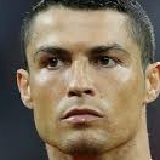

In [32]:
cri

In [13]:
np.around(np.array(cri) / 255.0, decimals=12).shape

(160, 160, 3)

## ***This  Function will be used to verify  identity given the ident***

In [29]:

def verify(image_path, identity, database, model):
    """
    Function that verifies if the person on the "image_path" image is "identity".
    
    Arguments:
        image_path -- path to an image
        identity -- string, name of the person you'd like to verify the identity. Has to be an employee who works in the office.
        database -- python dictionary mapping names of allowed people's names (strings) to their encodings (vectors).
        model -- your Inception model instance in Keras
    
    Returns:
        dist -- distance between the image_path and the image of "identity" in the database.
        door_open -- True, if the door should open. False otherwise.
    """
    # Step 1: Compute the encoding for the image. Use img_to_encoding() see example above. (≈ 1 line)
    encoding = img_to_encoding(image_path, model)
    # Step 2: Compute distance with identity's image (≈ 1 line)
    dist = tf.linalg.norm(encoding-database[identity])
    # Step 3: Open the door if dist < 0.7, else don't open (≈ 3 lines)
    if dist<0.90:
        print("It's " + str(identity) + ", welcome in!")
        door_open = True
    else:
        print("It's not " + str(identity) + ", please go away")
        door_open = False
    return dist, door_open

    
    


In [30]:
verify("/content/drive/MyDrive/croppedMostTrue/Cristiano Ronaldo/Cristiano Ronaldo104.png", "Cristiano Ronaldo", database, FRmodel)

It's Cristiano Ronaldo, welcome in!


(<tf.Tensor: shape=(), dtype=float32, numpy=0.8733634>, True)

In [33]:
verify("/content/drive/MyDrive/croppedMostTrue/Didier Drogba/Didier Drogba11.png", "Cristiano Ronaldo", database, FRmodel)

It's not Cristiano Ronaldo, please go away


(<tf.Tensor: shape=(), dtype=float32, numpy=1.3073534>, False)

In [39]:
verify("/content/drive/MyDrive/croppedMostTrue/Samuel Eto/Samuel Eto11.png","Didier Drogba", database, FRmodel)

It's not Didier Drogba, please go away


(<tf.Tensor: shape=(), dtype=float32, numpy=1.1037625>, False)

### 5.2 - Face *Recognition*

In [60]:

def who_is_it(image_path, database, model):
    """
    Implements face recognition for the office by finding who is the person on the image_path image.
    
    Arguments:
        image_path -- path to an image
        database -- database containing image encodings along with the name of the person on the image
        model -- your Inception model instance in Keras
    
    Returns:
        min_dist -- the minimum distance between image_path encoding and the encodings from the database
        identity -- string, the name prediction for the person on image_path
    """
    

    ## Step 1: Compute the target "encoding" for the image. Use img_to_encoding() see example above. ## (≈ 1 line)
    encoding =  img_to_encoding(image_path, model)
    
    ## Step 2: Find the closest encoding ##
    
    # Initialize "min_dist" to a large value, say 100 (≈1 line)
    min_dist = 100
    
    # Loop over the database dictionary's names and encodings.
    for (name, db_enc) in database.items():
        
        # Compute L2 distance between the target "encoding" and the current db_enc from the database. (≈ 1 line)
        dist = np.linalg.norm(db_enc-encoding)

        # If this distance is less than the min_dist, then set min_dist to dist, and identity to name. (≈ 3 lines)
        if dist<min_dist:
            min_dist = dist
            identity = name
    print(min_dist)
    if min_dist > 0.9:
        print("Not in the database.")
    else:
        print ("it's " + str(identity) + ", the distance is " + str(min_dist))
        
    return min_dist, identity

In [61]:


# BEGIN UNIT TEST
# Test 1 with Younes pictures 
who_is_it("/content/drive/MyDrive/croppedMostTrue/Pele/Edson Arantes do Nascimento303.png", database, FRmodel)

# Test 2 with Younes pictures 
test1 = who_is_it("/content/drive/MyDrive/croppedMostTrue/Pavel Nedved/Pavel Nedved13.png", database, FRmodel)
assert test1[1] == "Pavel Nedved"

# Test 3 with Younes pictures 
test2 = who_is_it("/content/drive/MyDrive/croppedMostTrue/Lionel Messi/Lionel Messi18.png", database, FRmodel)
assert test2[1] =="Lionel Messi"
# END UNIT TEST

0.6243091
it's Pele, the distance is 0.6243091
0.801165
it's Pavel Nedved, the distance is 0.801165
0.51107365
it's Lionel Messi, the distance is 0.51107365
